In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re, itertools, random
import matplotlib.pyplot as plt
import time

from gensim.models import word2vec
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist

C:\Anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
def read_data():
    global input_train, input_test
    # Read full training and test sets
    input_train = pd.read_csv("../../dat/train.tsv", sep = "\t")
    input_test = pd.read_csv("../../dat/test.tsv", sep = "\t")
    print("Read input")

# Read the raw data
read_data()

Read input


List sentences

In [3]:
def clean(text):
    """Remove posting header, split by sentences and words, keep only letters"""
    lines = re.split('[?!.:]\s', re.sub('^.*Lines: \d+', '', re.sub('\n', ' ', text)))
    return [re.sub('[^a-zA-Z]', ' ', line).lower().split() for line in lines]

In [4]:
sentences = [s for s in [s.strip().lower().split(" ") for i in input_train["item_description"].values for s in re.split("\.", str(i))] if len(s) > 2]

Train word2vec model with embedding vector size 20 and word to word contingency window of 5.

In [5]:
embedding_size = 20
starttime = time.time()
model = word2vec.Word2Vec(sentences, size=embedding_size, window=5, min_count=5, workers=4)
endtime = time.time()
print("Trained word2vec model in " + str(int(np.floor((endtime - starttime)/60))) + "m " + str(int((endtime - starttime)%60)) + "s.")

Trained word2vec model in 8m 27s.


Lookup some words and their nearest contextual siblings in embedding vector space. Seems to make a lot of sense :-)

In [6]:
lookup_words = ["shorts", "xbox", "shoes"]
words_to_visualize = [] # Save for visualization below

for w in lookup_words:
    print(w)
    for s in model.wv.most_similar([w]):
        print(s)
        words_to_visualize.append(s[0])

shorts
('pants', 0.9772350788116455)
('capris', 0.9650174379348755)
('pant', 0.923183023929596)
('crops', 0.9200932383537292)
('sweats', 0.9179499745368958)
('sweatpants', 0.9156811237335205)
('tights', 0.9104116559028625)
('pant,', 0.9068605899810791)
('shorts!', 0.9006787538528442)
('tops', 0.8930093050003052)
xbox
('wii', 0.8829836249351501)
('sony', 0.871570348739624)
('ps4', 0.8425512313842773)
('slimmest,', 0.8347933888435364)
('controller', 0.83165043592453)
('console', 0.7884513735771179)
('controllers', 0.7862071394920349)
('playstation', 0.7765994071960449)
('ds', 0.7704274654388428)
('kinect', 0.7600642442703247)
shoes
('sneakers', 0.88148033618927)
('sneaker', 0.8423055410385132)
('boots', 0.8322505950927734)
('sandals', 0.8286818861961365)
('shoes!', 0.8000724911689758)
('booties', 0.7979959845542908)
('skechers', 0.795136570930481)
('shoe', 0.7852073907852173)
('toddler', 0.7826910614967346)
('converse', 0.7734361886978149)


Let's visualize the embeddings by projecting embeddings in 2-dimensional space using t-SNE.

In [7]:
X = model[model.wv.vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1]);
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: could not allocate 32768000 bytes

Exception ignored in: 'sklearn.neighbors.quad_tree._QuadTree._insert_point_in_new_child'
Traceback (most recent call last):
  File "sklearn\neighbors\quad_tree.pyx", line 588, in sklearn.neighbors.quad_tree._QuadTree._resize
  File "sklearn\neighbors\quad_tree.pyx", line 608, in sklearn.neighbors.quad_tree._QuadTree._resize_c
  File "sklearn\tree\_utils.pyx", line 39, in sklearn.tree._utils.safe_realloc
MemoryError: could not allocate 32768000 bytes


MemoryError: 

In [9]:
# Train a K-means cluster model with 6 clusters
n_clusters = 6
embedding_cluster_model = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings)

For each cluster's centroid embedding collect the 20 nearest word embeddings

In [10]:
centroid_embedding_nearest_words = []
for centroid_embedding in embedding_cluster_model.cluster_centers_:
    centroid_embedding_nearest_words.append(
        np.argsort([i[0] for i in cdist(embeddings, np.array([centroid_embedding]), "euclidean")])[0:20]
    )

Plot the 20 nearest word embeddings using a distinct color per cluster

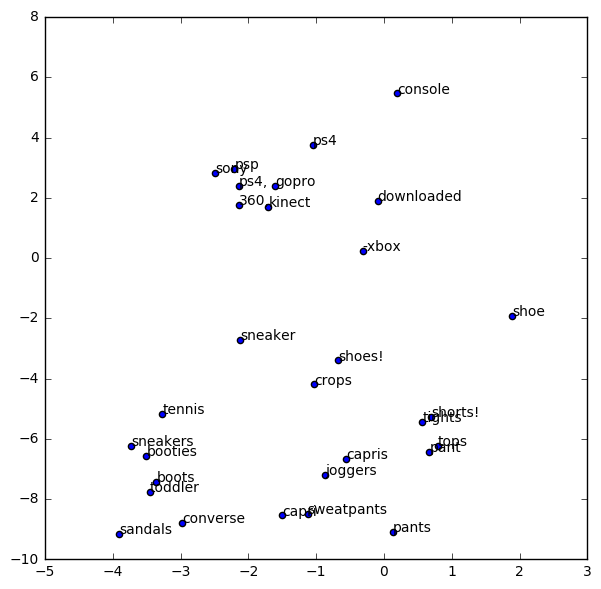

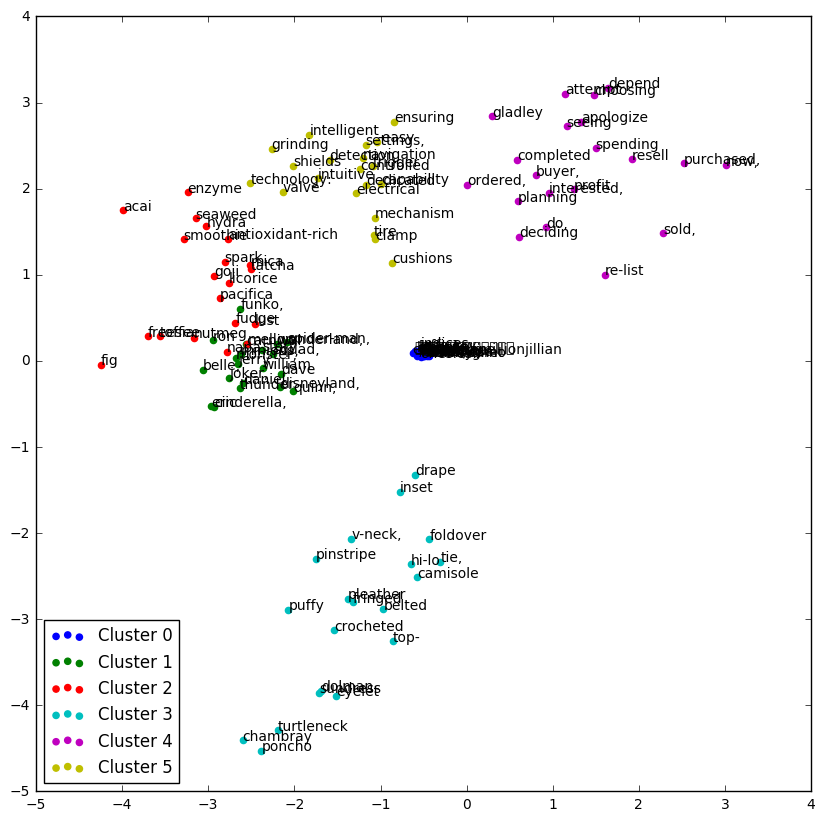

In [11]:
plt.figure(figsize=(10,10))
colors = itertools.cycle(["b","g","r","c","m","y","k","w"])
c = 0
for word_indices in centroid_embedding_nearest_words:
    clr = next(colors)
    plt.scatter(
        embeddings_2d_projection[word_indices,0],
        embeddings_2d_projection[word_indices,1],
        color=clr,
        label="Cluster " + str(c)
    )
    for ix in word_indices:
        x, y = embeddings_2d_projection[ix,:]
        plt.annotate(model.wv.index2word[ix], (x, y))
    c+=1
plt.legend(loc='lower left')
plt.show()